In [401]:
import pandas as pd
import json 
import numpy as np
import pyfolio as pf
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt


In [421]:
f = open('/home/matteo/freqtrade/user_data/backtest_results/backtest-result.json')
data = json.load(f) 
df = pd.DataFrame.from_dict(data, orient='columns')

In [422]:
df_kelly = df.copy()
df = df.rename(columns={0: "Pair", 1: "Return", 2: 'Date'})
df = df.drop(df.columns[[3, 4,5,6,7,8,9]], axis=1)
df['Date'] = pd.to_datetime(df['Date'], unit='s')
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Date'] =  df['Date'].astype('category')
#df = df.groupby(df['Date']).sum()

In [423]:
df_corr = (df.pivot_table(index=['Date'],columns='Pair',values='Return')).fillna(0)

In [424]:
df_corr

Pair,ADX/BTC,ALGO/BTC,ARK/BTC,EVX/BTC,FET/BTC,LEND/BTC,LINK/BTC,LRC/BTC,LSK/BTC,PIVX/BTC,STORJ/BTC,TNT/BTC,WTC/BTC
Date,,,,,,,,,,,,,
2019-01-05,-0.011799,0.000000,0.000000,0.0,0.000000,-0.001998,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.105960
2019-01-06,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.106088,0.000000
2019-01-07,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,-0.093258,0.000000,0.0,0.000000,0.000000,0.000000
2019-01-08,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,-0.100115,0.000000,0.000000
2019-01-09,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,-0.057102,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-22,0.000000,0.089964,0.000000,0.0,0.000000,-0.026755,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2020-05-24,0.093549,0.000000,0.119175,0.0,0.101688,0.000000,-0.0063,0.000000,0.000000,0.0,-0.016094,0.000000,0.103045
2020-05-25,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.010569,0.0,0.107314,0.015209,0.000000


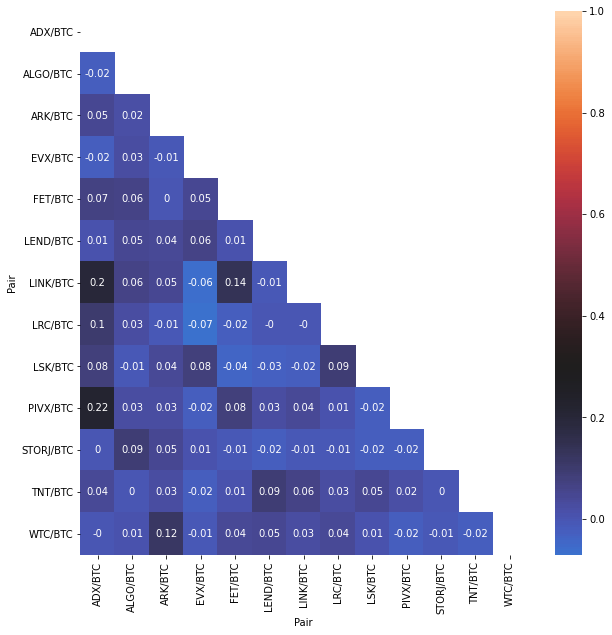

In [425]:
correlation = round(df_corr.corr(),2)
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(10,10))
p = sns.heatmap(correlation,center=0.3,annot=True,mask=mask);

In [247]:
df_kelly = df_kelly.rename(columns={0: "Pair", 1: "Return"})
df_kelly = df_kelly.drop(df_kelly.columns[[2,3, 4,5,6,7,8,9]], axis=1)
df_kelly['Pair'] =  df_kelly['Pair'].astype('category')


In [220]:
def kelly(df):
    positive = df.loc[df['Return'] > 0, 'Return']
    negative = df.loc[df['Return'] < 0, 'Return']
    n_positive = len(positive)
    n_negative = len(negative)
    avg_positive = positive.mean()
    avg_negative = negative.mean()
    W = n_positive / (n_positive + n_negative)
    R = avg_positive / abs(avg_negative)
    Kelly = ((R + 1) * W - 1)/ R
    return Kelly

In [248]:
rep = (df_kelly.groupby(df_kelly['Pair']).apply(kelly)).sort_values(ascending=True)

In [249]:
import plotly.express as px
fig = px.bar(y=rep, x=rep.index)
fig.show()

In [415]:
df = pd.DataFrame.from_dict(data, orient='columns')
df = df.rename(columns={0: "Pair", 1: "Return", 2: 'Date'})
df = df.drop(df.columns[[3, 4,5,6,7,8,9]], axis=1)
df['Date'] = pd.to_datetime(df['Date'], unit='s')
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Date'] =  df['Date'].astype('category')
df = df.groupby(df['Date']).sum()
start_date = df.index[0] 
end_date = df.index[len(df)-1]
delta = end_date - start_date
dd = [start_date + timedelta(days=x) for x in range((end_date- start_date).days + 1)] 
dff = pd.DataFrame()
dff['Date'] = dd
dff['Date'] = pd.to_datetime(dff['Date']).dt.date
dff['Date'] = dff['Date'].astype('category')
dff = dff.groupby(dff['Date']).sum()


In [416]:
tot = pd.merge(df_corr,dff,how='outer',left_index=True,right_index=True).fillna(0)

In [418]:
tot

,ADX/BTC,ALGO/BTC,ARK/BTC,EVX/BTC,FET/BTC,LEND/BTC,LINK/BTC,LRC/BTC,LSK/BTC,PIVX/BTC,STORJ/BTC,TNT/BTC,WTC/BTC
Date,,,,,,,,,,,,,
1546646400000000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1546732800000000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1546819200000000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1546905600000000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1546992000000000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590192000000000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1590278400000000000,0.093549,0.0,0.119175,0.0,0.101688,0.000000,-0.0063,0.0,0.000000,0.0,-0.016094,0.000000,0.103045
1590364800000000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.0,0.010569,0.0,0.107314,0.015209,0.000000


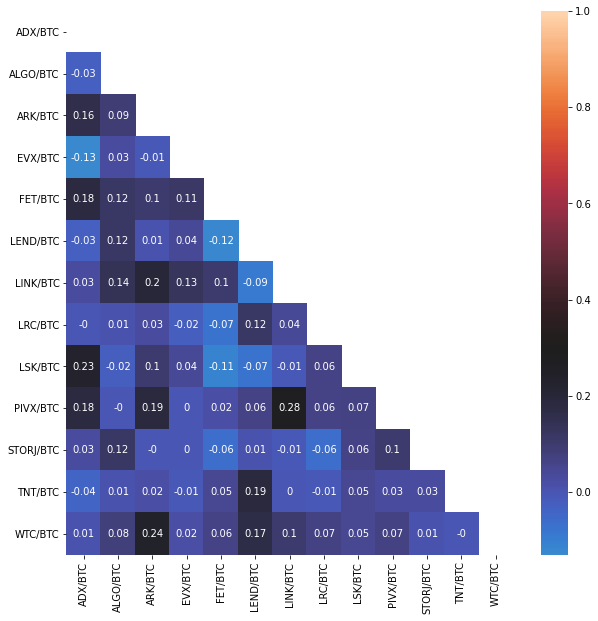

In [417]:
correlation = round(tot.corr(),2)
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(10,10))
p = sns.heatmap(correlation,center=0.3,annot=True,mask=mask);

In [15]:
guadagni = pd.Series(tot['Return'],index=dff.index)

Start date,2020-04-05
End date,2020-05-26
Total months,2
,Backtest
Annual return,146026014.0%
Cumulative returns,1770.8%
Annual volatility,273.8%
Sharpe ratio,6.39
Calmar ratio,6188383.25
Stability,0.94
Max drawdown,-23.6%


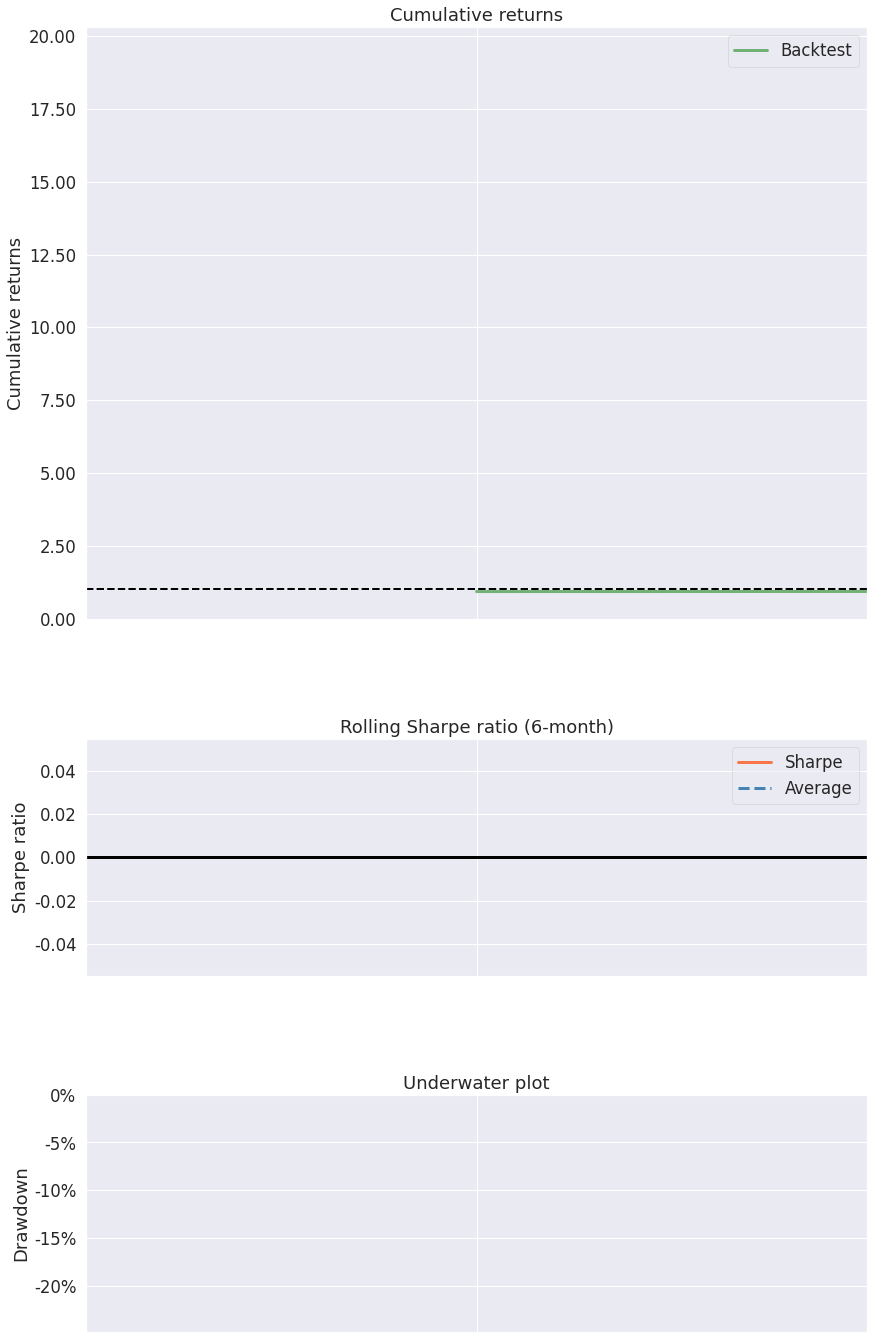

In [16]:
pf.create_simple_tear_sheet(guadagni)